In [1]:
import numpy as np
import numpy.random as npr
from numpy.random import dirichlet, uniform
from scipy.stats import beta, norm, bernoulli
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import beta as Beta
from tqdm import tqdm_notebook as tqdm
from scipy.stats import beta
from scipy.special import roots_legendre
from easydict import EasyDict as edict
import multiprocessing as mp
import pickle
%matplotlib inline

In [2]:
from utils import ESSBetaCon, ESSBetaH

### Parameters

In [3]:
ns = [80, 100, 120]
n = 100
Ms = np.arange(10, 200, step=10)

### Binary data

In [4]:
ps_range = [0.4, 0.6]
p = 0.5
pss = uniform(ps_range[0], ps_range[1], size=(50, 3))

### Fixed weight paremeters

In [5]:
nESSs = []
for ps in tqdm(pss):
    nESS = ESSBetaCon(M=1, ns=ns, ps=ps, n=n, p=p)
    nESSs.append(nESS)
nESSs = np.array(nESSs)

In [6]:
Ms = np.arange(10, 200, step=10)
ESS1All = []
for M in Ms:
    ESS1All.append(M*(nESSs + 1) - 1)
ESS1All = np.array(ESS1All)

### Draw weight parameters from prior

In [17]:
#ps = pss[0]
#Ds = [ bernoulli.rvs(ps[i], size=ns[i]) for i in range(len(ns))]
#ESSUIPD = ESSBetaH(Ds=Ds, n=n, M=20, C=1e6)
#ESSUIPD.getESS()

In [13]:
with open("beta_ESS_UIPD_4_6.pkl", "rb") as f:
     ESS2results = pickle.load(f)

In [14]:
ESS2All = []
for i in range(len(ESS2results)):
    ESS2M = [res.ESS for res in ESS2results[i]]
    ESS2All.append(ESS2M)
    
ESS2All = np.array(ESS2All)

In [15]:
ESS2All.mean(axis=1)

array([  8.88,  17.98,  26.28,  34.86,  42.84,  51.16,  56.6 ,  63.68,
        69.16,  79.36,  85.44,  88.98,  94.72, 102.58, 105.5 , 121.98,
       124.16, 123.28, 142.58])

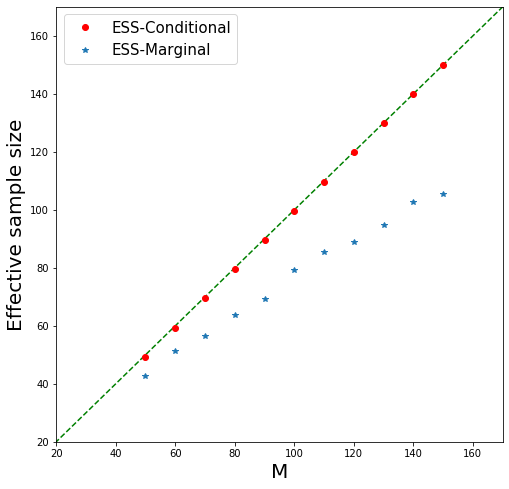

In [28]:
plt.figure(figsize=[8, 8])
figureim, upLim = 4, 15
plt.plot(Ms, Ms, "--g")
plt.plot(Ms[lowLim:upLim], ESS1All.mean(axis=1)[lowLim:upLim], "or", label="ESS-Conditional")
plt.plot(Ms[lowLim:upLim], ESS2All.mean(axis=1)[lowLim:upLim], "*", label="ESS-Marginal")
plt.ylim([20, 170])
plt.xlim([20, 170])
plt.legend(fontsize=15)
plt.xlabel("M", fontsize=20)
_ = plt.ylabel("Effective sample size", fontsize=20)
plt.savefig("ESSBinary.jpg")

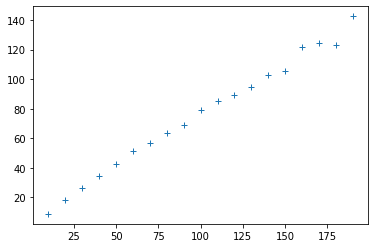

In [26]:
plt.plot(Ms[::1], np.mean(ESS2All, axis=1)[::1], "+", label="ESS2")